<a href="https://colab.research.google.com/github/AlieGlobal/cvlab/blob/master/ImageAnnotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

## How to Computer Vision:

With Machine Learning of course!

![](https://imgs.xkcd.com/comics/machine_learning.png)

Maybe Deep Learning?

![](https://cdn-images-1.medium.com/max/720/1*fRctlHDweu2foq6bBmzCgA.png =100x)



```
>>> print(computer_vision == conv_nets)
False
```



But, as we've seen, there's a whole branch of work that did this with traditional methods. Today, we will work through some things that are important to know about computer vision, especially with respect to Duckietown.

## OpenCV


--2020-04-14 12:53:33--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 104.26.3.173, 104.26.2.173
Connecting to www.duckietown.org (www.duckietown.org)|104.26.3.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159896 (156K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 156.15K  --.-KB/s    in 0.03s   

2020-04-14 12:53:33 (4.77 MB/s) - ‘dt.jpg’ saved [159896/159896]

<class 'numpy.ndarray'>


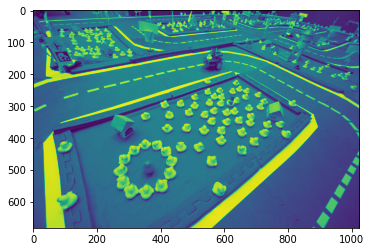

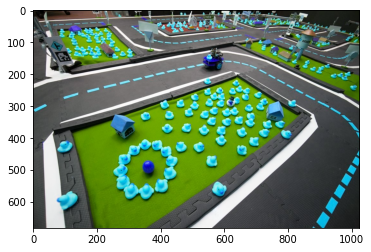

In [2]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg

import cv2

# Load in Grayscale
img = cv2.imread('./dt.jpg', 0)

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('./dt.jpg')

plt.imshow(img)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img)


Notice anything different about the above image? You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

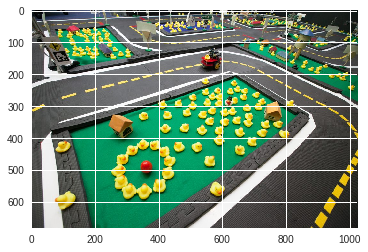

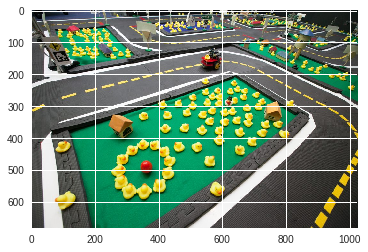

In [0]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


### Common Image Manipulations

OpenCV is super useful for doing lots of image transformations, and we will experiment with some of the basic ones below. 

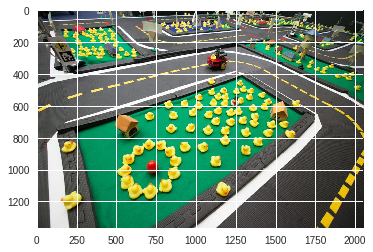

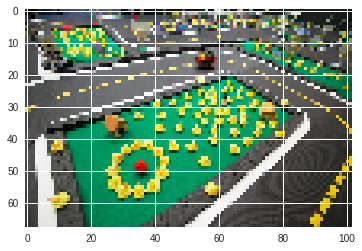

In [0]:
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# What are some practical constraints that have to do with image resizing?

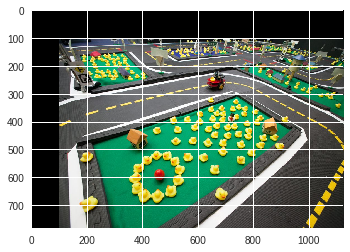

In [0]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()




### (Slightly) Advanced Image Manipulation Techniques

For certain tasks (i.e object detection), the image needs to be processed before it is fed into our module, for better results. Here, we go over some advanced image manipulation techniques.

Things like blurring, smoothing, and thresholding can be useful for things where we can make strong assumptions. For example, when we know our lane markings will be white, we can threshold our image pixels to filter out the values that aren't close enough to "white", which is represented (in RGB / BGR) as (255, 255, 255)

You can also do things like Background Subtraction, which will expose differences in between frames.

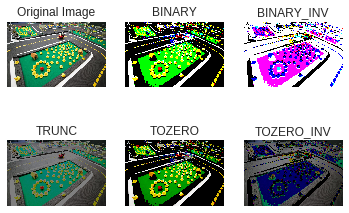

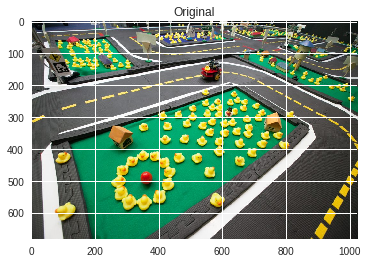

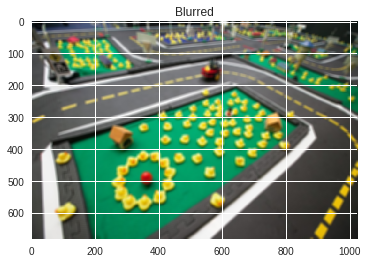

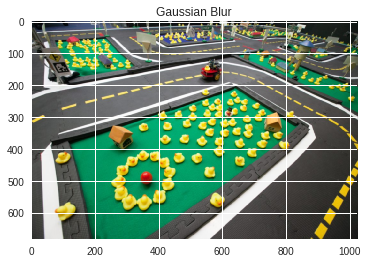

In [0]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()
